<a href="https://colab.research.google.com/github/unrebby/data/blob/main/homework_practice_03_gd_Antonova_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12.5.

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.


Градиент MSE записывается как

$$\nabla Q(w) = 2X^T(Xw - y).$$



### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [1]:
import numpy as np

In [2]:
class BaseDescent_():
    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        return sum((x @ self.w - y)**2) / y.shape[0]

    def predict(self, x: np.ndarray) -> np.ndarray:
        return x @ self.w

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [3]:
class VanillaGradientDescent_():
    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        ret = self.lr()
        self.w -= ret * gradient
        return -ret * gradient

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return (2 / y.shape[0]) * x.T @ (x @ self.w - y)


### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

In [4]:
class StochasticDescent_():
    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        inds = np.random.randint(x.shape[0], size=self.batch_size)
        x_ = x[inds]
        y_ = y[inds]
        return (2 / x_.shape[0]) * x_.T @ (x_ @ self.w - y_)


### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

In [5]:
class MomentumDescent_():
    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        self.h *= self.alpha
        self.h += self.lr() * gradient
        self.w -= self.h
        return -self.h

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-03-gd/adam_meme.png?raw=1)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [6]:
class Adam_():
    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        self.iteration += 1
        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * ((gradient) ** 2)

        m_ = self.m / (1 - (self.beta_1) ** self.iteration)
        v_ = self.v / (1 - (self.beta_2) ** self.iteration)

        ret = (self.lr() / (self.eps + (v_) ** (1 / 2))) * m_
        self.w -= ret
        return -ret

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [7]:
from __future__ import annotations

from typing import List

import numpy as np

class LinearRegression:
    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        for i in range(self.max_iter):
            if i == 0:
                self.loss_history.append(self.descent.calc_loss(x, y))
            diff = self.descent.step(x, y)
            self.loss_history.append(self.descent.calc_loss(x, y))
            if np.isnan(diff).any():
                break
            if np.sum(diff ** 2) < self.tolerance:
                break

        return self

## Задание 3. Проверка кода (0 баллов)

Все эти функции я также прописала в файлики descent.py и linear_regression.
 
Подгрузим обновленные файлики.


In [8]:
from google.colab import files
files.upload()

Saving descents.py to descents.py


{'descents.py': b'from dataclasses import dataclass\r\nfrom enum import auto\r\nfrom enum import Enum\r\nfrom typing import Dict\r\nfrom typing import Type\r\n\r\nimport numpy as np\r\n\r\n\r\n@dataclass\r\nclass LearningRate:\r\n    lambda_: float = 1e-3\r\n    s0: float = 1\r\n    p: float = 0.5\r\n    delta_: float = 1e-3\r\n\r\n    iteration: int = 0\r\n\r\n    def __call__(self):\r\n        """\r\n        Calculate learning rate according to lambda (s0/(s0 + t))^p formula\r\n        """\r\n        self.iteration += 1\r\n        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p\r\n\r\n\r\nclass LossFunction(Enum):\r\n    MSE = auto()\r\n    MAE = auto()\r\n    LogCosh = auto()\r\n    Huber = auto()\r\n\r\n\r\nclass BaseDescent:\r\n    """\r\n    A base class and templates for all functions\r\n    """\r\n\r\n    def __init__(self, dimension: int, lambda_: float = 1e-3, delta_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):\r\n        """\r\n     

In [9]:
from google.colab import files
files.upload()

Saving linear_regression.py to linear_regression.py


{'linear_regression.py': b'from __future__ import annotations\r\n\r\nfrom typing import List\r\n\r\nimport numpy as np\r\n\r\nfrom descents import BaseDescent\r\nfrom descents import get_descent\r\n\r\n\r\nclass LinearRegression:\r\n    """\r\n    Linear regression class\r\n    """\r\n\r\n    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):\r\n        """\r\n        :param descent_config: gradient descent config\r\n        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)\r\n        :param max_iter: stopping criterion for iterations (int)\r\n        """\r\n        self.descent: BaseDescent = get_descent(descent_config)\r\n\r\n        self.tolerance: float = tolerance\r\n        self.max_iter: int = max_iter\r\n\r\n        self.loss_history: List[float] = []\r\n\r\n    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:\r\n        """\r\n        Fitting descent weights for x and y dataset\r\

In [10]:
%load_ext autoreload

In [11]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [12]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [13]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [14]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: ID: 72862436 [ссылка](https://contest.yandex.ru/contest/41257/run-report/72862436/) 


* **StochasticDescent**: ID: 72862217 [ссылка](https://contest.yandex.ru/contest/41257/run-report/72862217/) 


* **MomentumDescent**: ID: 72862385 [ссылка](https://contest.yandex.ru/contest/41257/run-report/72862385/) 


* **Adam**: ID: 72862272 [ссылка](https://contest.yandex.ru/contest/41257/run-report/72862272/) 


* **LinearRegression**: ID: 72954205 [ссылка](https://contest.yandex.ru/contest/41257/run-report/72954205/) 

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [15]:
!wget https://github.com/esokolov/ml-course-hse/raw/master/2022-fall/homeworks-practice/homework-practice-03-gd/autos.csv

--2022-10-31 13:16:31--  https://github.com/esokolov/ml-course-hse/raw/master/2022-fall/homeworks-practice/homework-practice-03-gd/autos.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-03-gd/autos.csv [following]
--2022-10-31 13:16:31--  https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-03-gd/autos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14767172 (14M) [text/plain]
Saving to: ‘autos.csv’

autos.csv           100%[===================>]  14.08M  

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [17]:
data = pd.read_csv('autos.csv')

In [18]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

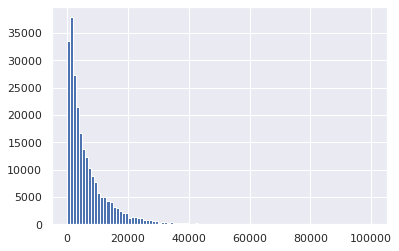

In [19]:
plt.hist(data['price'], bins=100)
plt.show()

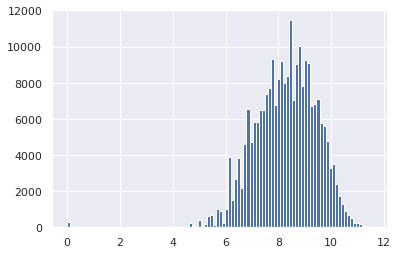

In [20]:
plt.hist(np.log(data['price'].values), bins=100)
plt.show()

Данные столбца цены вроде нормальные, так как график распределения цены получился понятным, но также добавим столбец логарифма в данные и будем дальше работать с ним, так как на графике цены все "высокие показатели" сосредоточены в очень узком диапазоне, а на графике логарифма это как бы растянуто, т. е. мы будем внимательнее изучать этот диапазон.

Посмотрим на выбросы:


In [21]:
data['log_price'] = np.log(data['price'])

Размер всей выборки 241190
Размер выборки без выбросов 241190


(array([2.7400e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        6.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 5.3000e+01, 3.0000e+00,
        9.0000e+00, 1.3000e+01, 9.0000e+00, 2.3000e+01, 3.0000e+01,
        2.2300e+02, 6.6000e+01, 3.9000e+01, 3.8700e+02, 5.7000e+01,
        2.0500e+02, 6.1100e+02, 6.7400e+02, 1.2200e+02, 9.9600e+02,
        8.7400e+02, 2.2100e+02, 1.0160e+03, 3.8750e+03, 1.5040e+03,
        2.6720e+03, 3.8150e+03, 2.1950e+03, 4.6290e+03, 6.5390e+03,
        4.7130e+03, 5.8320e+03, 5.7990e+03, 6.4780e+03, 6.5050e+03,
        7.3920e+03, 7.6930e+03, 9.3290e+03, 6.7850e+03, 8.2190e+03,
        9.2220e+03, 7.9640e+03, 8.3710e+03, 1.14

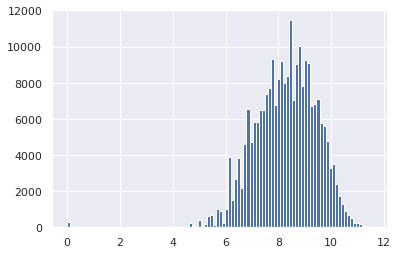

In [22]:
tmp1 = data[data['log_price'] < data['log_price'].mean() + 3 * data['log_price'].std()]
print('Размер всей выборки', data.shape[0])
print('Размер выборки без выбросов', tmp1.shape[0])
plt.hist(tmp1['log_price'], bins=100)

Выбросов вроде нет.

Проводим исследование данных:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              241190 non-null  object 
 1   model              241190 non-null  object 
 2   vehicleType        241190 non-null  object 
 3   gearbox            241190 non-null  object 
 4   fuelType           241190 non-null  object 
 5   notRepairedDamage  241190 non-null  object 
 6   powerPS            241190 non-null  int64  
 7   kilometer          241190 non-null  int64  
 8   autoAgeMonths      241190 non-null  int64  
 9   price              241190 non-null  int64  
 10  log_price          241190 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ MB


Text(0.5, 1.0, 'dependence')

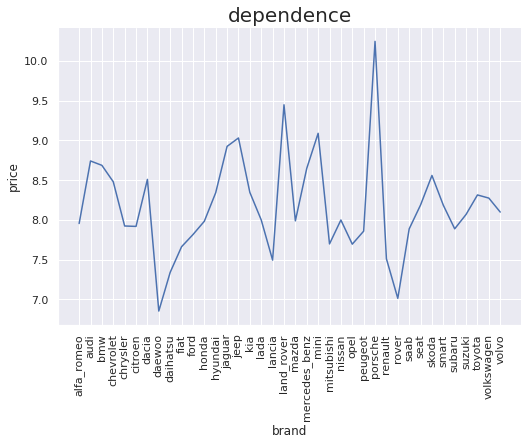

In [24]:
x = data.groupby('brand')['log_price'].mean().index
y = data.groupby('brand')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('brand')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'dependence')

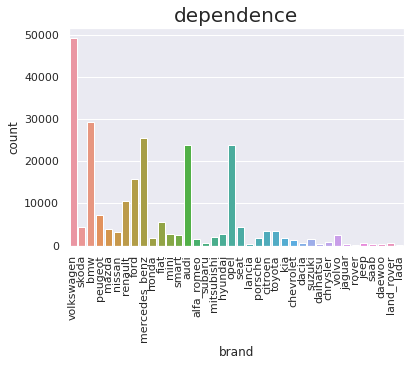

In [25]:
x = data['brand']
sns.countplot(x)

plt.xlabel('brand')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

Ну тут логика прослеживается: порш - очень дорогой, део - самый дешевый. Такой признак будет скорее категориальным.

Text(0.5, 1.0, 'dependence')

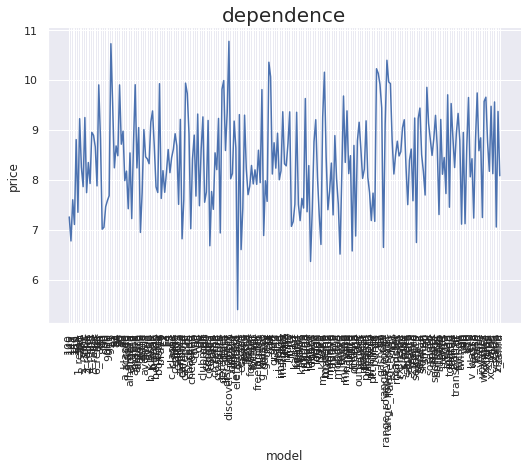

In [26]:
x = data.groupby('model')['log_price'].mean().index
y = data.groupby('model')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('model')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

Рассматривать model как признак, мне кажется бессмысленным, так как вариантов моделей очень много, и зависимость проследить нельзя (показано на графике). Поэтому мы будем рассмтаривать brand (это как группировка различных моделей). 

Text(0.5, 1.0, 'dependence')

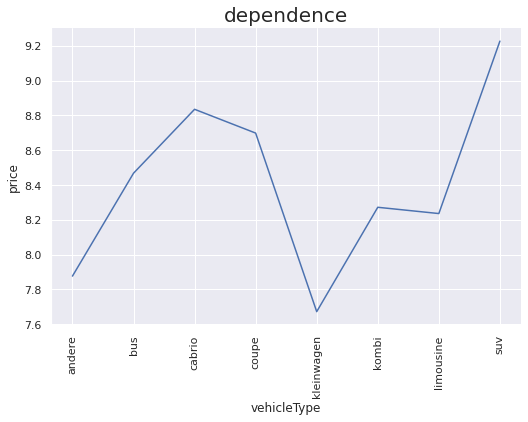

In [27]:
x = data.groupby('vehicleType')['log_price'].mean().index
y = data.groupby('vehicleType')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('vehicleType')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'dependence')

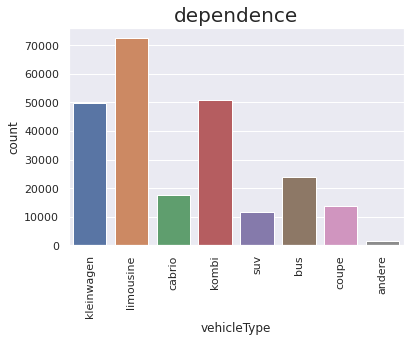

In [28]:
x = data['vehicleType']
sns.countplot(x)

plt.xlabel('vehicleType')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

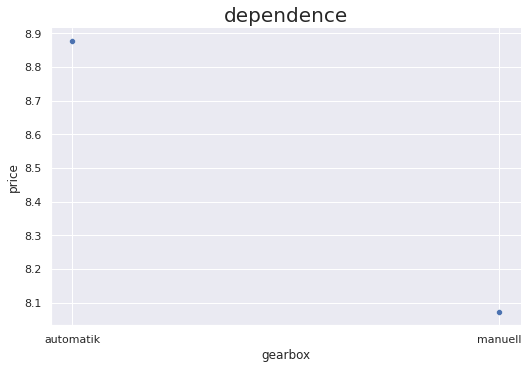

In [29]:
x = data.groupby('gearbox')['log_price'].mean().index
y = data.groupby('gearbox')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5)

plt.xlabel('gearbox')
plt.ylabel('price')
plt.title('dependence', fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'dependence')

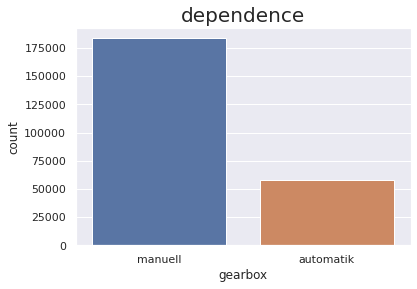

In [30]:
x = data['gearbox']
sns.countplot(x)

plt.xlabel('gearbox')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

Это явно бинарный признак, т. е. численный.

Text(0.5, 1.0, 'dependence')

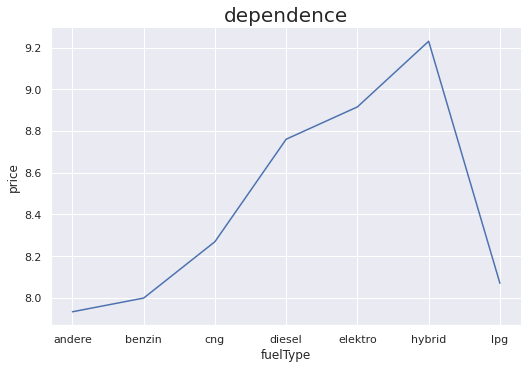

In [31]:
x = data.groupby('fuelType')['log_price'].mean().index
y = data.groupby('fuelType')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('fuelType')
plt.ylabel('price')
plt.title('dependence', fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'dependence')

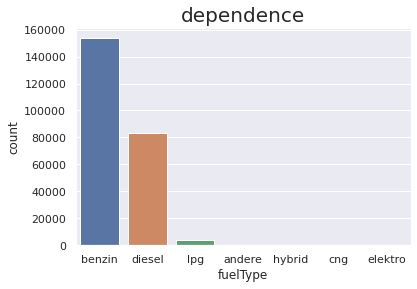

In [32]:
x = data['fuelType']
sns.countplot(x)

plt.xlabel('fuelType')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

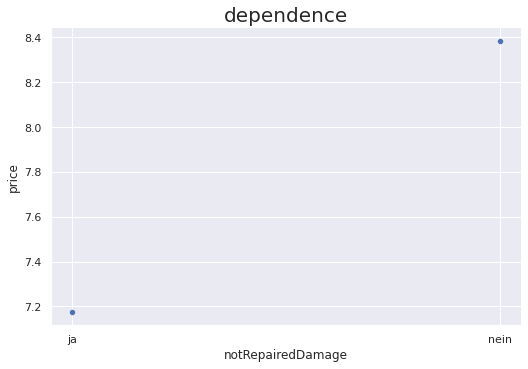

In [33]:
x = data.groupby('notRepairedDamage')['log_price'].mean().index
y = data.groupby('notRepairedDamage')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5)

plt.xlabel('notRepairedDamage')
plt.ylabel('price')
plt.title('dependence', fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'dependence')

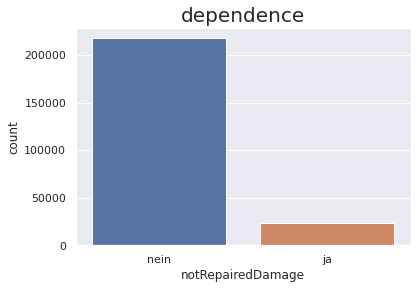

In [34]:
x = data['notRepairedDamage']
sns.countplot(x)

plt.xlabel('notRepairedDamage')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

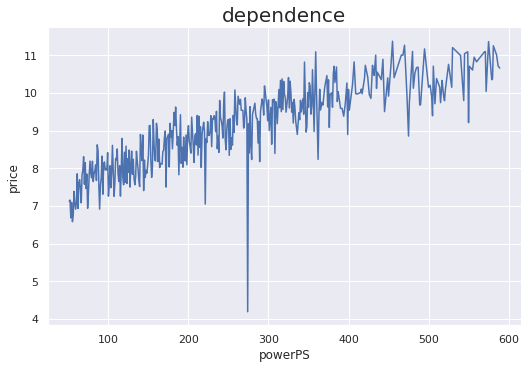

In [35]:
x = data.groupby('powerPS')['log_price'].mean().index
y = data.groupby('powerPS')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('powerPS')
plt.ylabel('price')
plt.title('dependence', fontsize=20)

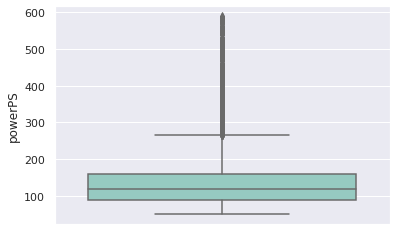

In [36]:
sns.boxplot(y = data['powerPS'], palette="Set3", data = data)

Тут есть выбросы, уберем их.

In [37]:
tmp = data[(data['powerPS'] < data['powerPS'].mean() + 3 * data['powerPS'].std())]

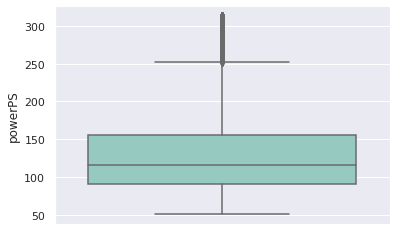

In [38]:
sns.boxplot(y = tmp['powerPS'], palette="Set3", data = tmp)

Так стало лучше.

In [39]:
data = tmp

Text(0.5, 1.0, 'dependence')

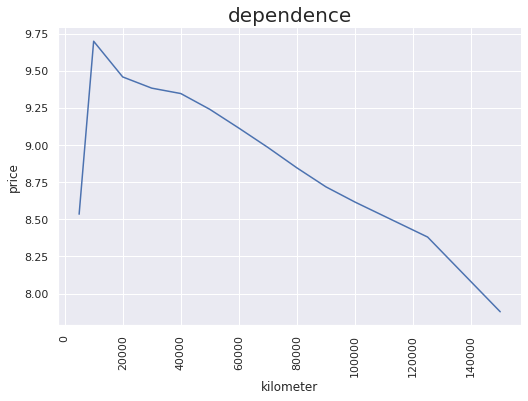

In [40]:
x = data.groupby('kilometer')['log_price'].mean().index
y = data.groupby('kilometer')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('kilometer')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

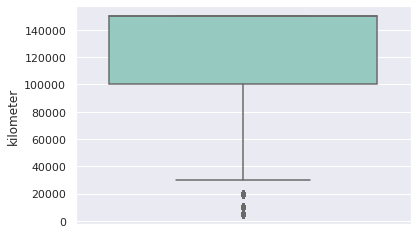

In [41]:
sns.boxplot(y = data['kilometer'], palette="Set3", data = data)

В kilometer не особо много выбросов.

Text(0.5, 1.0, 'dependence')

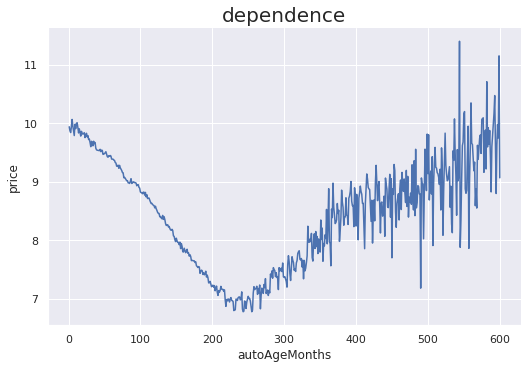

In [42]:
x = data.groupby('autoAgeMonths')['log_price'].mean().index
y = data.groupby('autoAgeMonths')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('autoAgeMonths')
plt.ylabel('price')
plt.title('dependence', fontsize=20)

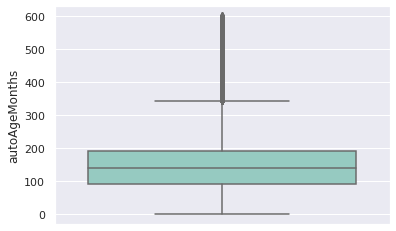

In [43]:
sns.boxplot(y = data['autoAgeMonths'], palette="Set3", data = data)

In [44]:
tmp = data[(data['autoAgeMonths'] < data['autoAgeMonths'].mean() + 3 * data['autoAgeMonths'].std())]

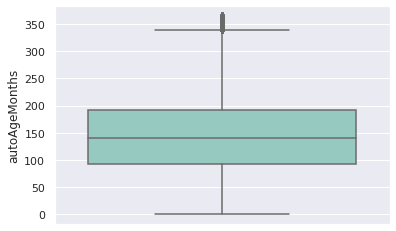

In [45]:
sns.boxplot(y = tmp['autoAgeMonths'], palette="Set3", data = tmp)

In [46]:
data = tmp

В качестве сильных признаков можно выделить kilometer (численный), powerPS (численный), notRepairedDamage (численный - бинарный), fuelType (категориальный), gearbox (численный - бинарный), brand (категориальный), vehicleType (категориальный), autoAgeMonths (численный).

Бинарные предобрабатывать не надо.

In [47]:
# переведем признаки gearbox и notRepairedDamage в бинарные (т. е. сделаем значения 1/0)

data['gearbox'] = data['gearbox'].replace({'manuell' : 0, 'automatik' : 1})
data['notRepairedDamage'] = data['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
categorical = ['brand', 'vehicleType', 'fuelType']
numeric = ['kilometer', 'powerPS', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage']

# YOUR CODE (EDA):

In [49]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [51]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

print(X_train.shape[0], X_val.shape[0], X_test.shape[0])

188357 23545 23545


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [52]:
# YOUR CODE:
from sklearn.metrics import r2_score
import math

In [53]:
all_lambda = np.logspace(-4, 1, 20)
all_methods = ['full', 'stochastic', 'momentum', 'adam']

In [54]:
r2 = []
iters = []
lambda_for_methods = []
all_errs = []
to_add = all_lambda[0]
for method_now in all_methods:
  best_r2 = -1000
  best_r2_train = 0
  best_r2_test = 0
  best_iters = 301
  loss = []
  for lambda_now in all_lambda:
      descent_config = {
      'descent_name': method_now,
      'kwargs': {
          'lambda_': lambda_now,
          'dimension': X_val.shape[1]}}
      descent = get_descent(descent_config)
      regr = LinearRegression(descent_config=descent_config)
      regr.fit(X_val, y_val.to_numpy())
      now_r2 = r2_score(y_val, regr.predict(X_val))
      if (best_r2 == -1000) | (best_r2 < now_r2):
        best_r2_train = r2_score(y_train, regr.predict(X_train)) # считаем метрику на обучающей выборке
        best_r2_test = r2_score(y_test, regr.predict(X_test)) # считаем метрику на тестовой выборке
        best_iters = len(regr.loss_history) # считаем количество итераций до сходимости
        to_add = lambda_now
        best_r2 = now_r2
        regr.fit(X_train, y_train.to_numpy())
        loss = regr.loss_history # для задания 5.2
  lambda_for_methods.append(to_add)
  r2.append(best_r2_train)
  r2.append(best_r2_test)
  iters.append(best_iters)
  all_errs.append(loss)


In [55]:
print('full')
print('r2_train = ', r2[0])
print('r2_test = ', r2[1])
print('\n')

print('stochastic')
print('r2_train = ', r2[2])
print('r2_test = ', r2[3])
print('\n')

print('momentum')
print('r2_train = ', r2[4])
print('r2_test = ', r2[5])
print('\n')

print('adam')
print('r2_train = ', r2[6])
print('r2_test = ', r2[7])


full
r2_train =  0.7639176305754563
r2_test =  0.746497438701982


stochastic
r2_train =  0.754582640625341
r2_test =  0.7367684089108772


momentum
r2_train =  0.7683414172411553
r2_test =  0.7509406444061973


adam
r2_train =  0.7722758892738862
r2_test =  0.7542521985334563


In [56]:
print('Количество итераций до сходимости:')
print('full:', iters[0])
print('stochastic:', iters[1])
print('momentum:', iters[2])
print('adam:', iters[3])


Количество итераций до сходимости:
full: 77
stochastic: 301
momentum: 105
adam: 91


In [57]:
lambda_for_methods

[2.9763514416313193, 0.8858667904100823, 0.8858667904100823, 1.623776739188721]

Теперь в lambda_for_methods хранятся оптимальные длины шага.

Выделим их в отдельные переменные:

In [58]:
lambda_full = lambda_for_methods[0]
lambda_stochastic = lambda_for_methods[1]
lambda_momentum = lambda_for_methods[2]
lambda_adam = lambda_for_methods[3]

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

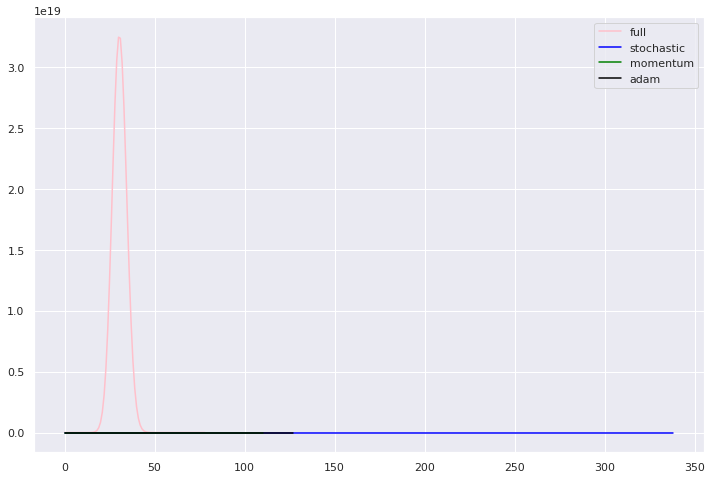

In [59]:
plt.figure(figsize=(12,8))
plt.plot(all_errs[0], color='pink', label='full')
plt.plot(all_errs[1], color='blue', label='stochastic')
plt.plot(all_errs[2], color='green', label='momentum')
plt.plot(all_errs[3], color='black', label='adam')
plt.legend()

Нарисуем еще отдельный график для stochstic, momemtum, adam, потому что тут плохо видно их.

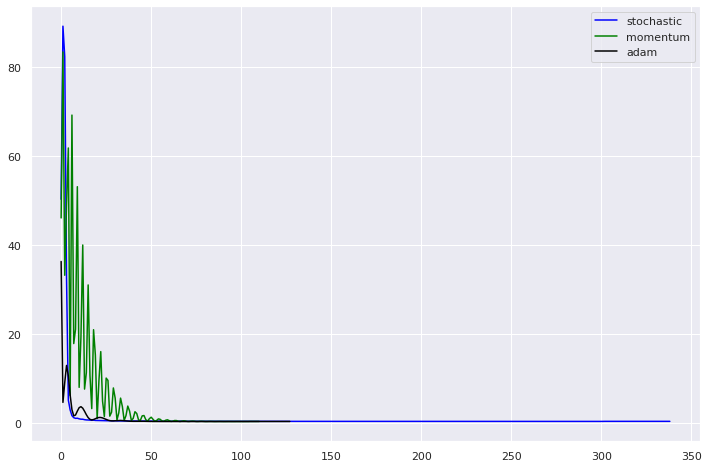

In [60]:
plt.figure(figsize=(12,8))
plt.plot(all_errs[1], color='blue', label='stochastic')
plt.plot(all_errs[2], color='green', label='momentum')
plt.plot(all_errs[3], color='black', label='adam')
plt.legend()

Оценка по метрике r2 у momentum и adam получилась самой большой => самой лучшей.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [61]:
batch_sizes = np.arange(5, 500, 10)

import time
import timeit

# YOUR CODE:
times = np.zeros(50)
iters = np.zeros(50)

k = 10

In [62]:
for i in range(k):
  times_now = []
  iters_now = []

  for batch_now in batch_sizes:
    start = time.time()

    descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'lambda_': lambda_stochastic,
        'dimension': X_train.shape[1],
        'batch_size': batch_now}}
    descent = get_descent(descent_config)
    regr = LinearRegression(descent_config=descent_config)
    regr.fit(X_train, y_train.to_numpy())

    finish = time.time()

    times_now.append(finish - start)
    iters_now.append(len(regr.loss_history))

  times += times_now
  iters += iters_now

times *= (1 / 10)
iters *= (1 / 10)

In [63]:
# среднее значение времени для каждого батча
times

array([6.34502182, 6.56892712, 6.25213113, 5.96743455, 6.20075281,
       6.05622592, 5.36947873, 4.76531458, 4.68209143, 4.51764987,
       3.9079145 , 3.95196159, 3.54292095, 3.55788281, 3.59441521,
       3.46548121, 3.16393261, 3.03919985, 3.01486695, 3.0161422 ,
       2.9056535 , 2.93321819, 2.81973357, 2.83726983, 2.49524524,
       2.49804647, 2.45126665, 2.48221815, 2.63357954, 2.54400823,
       2.36630468, 2.2281775 , 2.32357755, 2.32558994, 2.17137613,
       2.16612108, 2.13199885, 2.22522812, 2.16936681, 2.34803624,
       2.13467457, 2.04860234, 2.21064937, 2.05392408, 2.01461525,
       1.8577971 , 1.8635818 , 1.89356232, 1.81074562, 2.11373477])

In [64]:
# среднее значение количества итераций для каждого батча 
iters

array([301. , 301. , 297.7, 287.5, 286.5, 288.6, 258.3, 228.3, 225.4,
       217.4, 187.9, 190.2, 170.6, 170.7, 172.1, 166.5, 151.8, 146.1,
       144.5, 141.2, 136.3, 131. , 135. , 136.3, 119.6, 120. , 117.7,
       115.8, 117.1, 121.8, 113.1, 106.8, 111.4, 111.1, 103.7, 103.9,
       101.8, 106.6, 103.8, 105. ,  95.8,  98. , 105.3,  94.7,  96.5,
        88.8,  88.8,  90.1,  86.4, 100.6])

Text(0.5, 1.0, 'dependence')

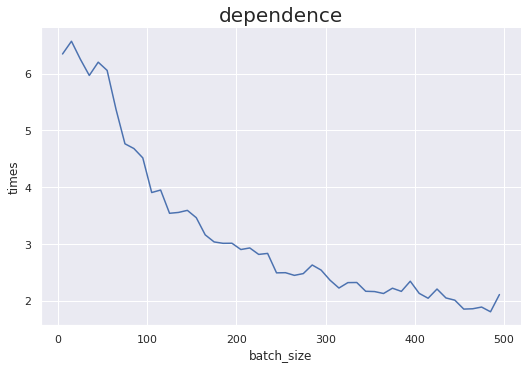

In [65]:
x = batch_sizes
y = times
sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('batch_size')
plt.ylabel('times')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

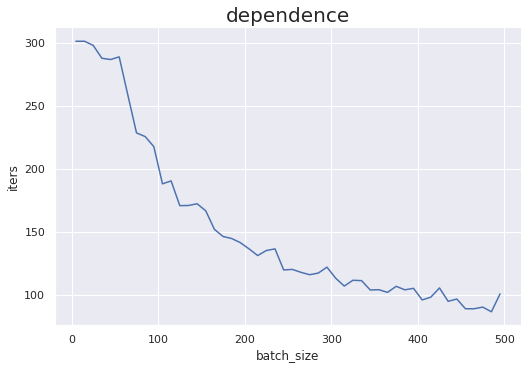

In [66]:
x = batch_sizes
y = iters
sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('batch_size')
plt.ylabel('iters')
plt.title('dependence', fontsize=20)

In [67]:
# выведем значения batch_size, где время максимально (максимумы на графике)
tmp0 = sorted(times)[-7:]
for i in range(len(times)):
  if len(np.where(tmp0 == times[i])[0]) == 0:
    continue
  print(batch_sizes[i])

5
15
25
35
45
55
65


In [68]:
# выведем значения batch_size, где время минимальны (минимумы на графике)
tmp1 = sorted(times)[0:7]
for i in range(len(times)):
  if len(np.where(tmp1 == times[i])[0]) == 0:
    continue
  print(batch_sizes[i])

415
435
445
455
465
475
485


* с семинара: чем больше размер подвыборки, тем более стабильная траектория градиентного спуска. Интереснее посмотреть, как это влияет на скорость сходимости. /../ Видно, что увеличение размера батча примерно до 100 позволяет добиться существенного ускорения сходимости. В то же время увеличение батча в 100 раз приводит и к пропорциональному замедлению каждого шага градиентного спуска. Поэтому, как правило, имеет смысл оценивать градиент по небольшой подвыборке.

Таким образом выше мы выделили оптимальные значения batch_size.

Таким образом, из графиков видно, что чем больше размер выборки, тем меньше итераций необходимо, так как направление спуска будет более четким. 

Итог: 

Чем больше выборка, тем точнее будет вычисляться градиентный спуск (направление, куда нам надо сдвинуться) => в точку минимума придём за меньшее количество итераций, так как мы не будем "прыгать из стороны в сторону". 

По поводу графика времени, я пока не понимаю, как объяснить. С одной стороны, чем больше выборка, тем дольше считаем градиентный спуск, так как больше объектов. С другой стороны, на графике можно заметить, что тренд нисходящий, т. е. время уменьшается при увелечении выборки. 

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

In [69]:
class BaseDescentReg_():
    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of loss function and L2 regularization with respect to weights
        """
        l2_gradient: np.ndarray = self.w

        l2_gradient[-1] = 0

        return super().calc_gradient(x, y) + l2_gradient * self.mu



Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: ID : 73021878 [ссылка](https://contest.yandex.ru/contest/41257/run-report/73021878/)

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [70]:
# YOUR CODE:
all_lambda = np.logspace(-4, 1, 30)
all_mu = np.logspace(-10, 0.5, 30)
all_methods = ['full', 'stochastic', 'momentum', 'adam']

In [71]:
iters_reg = []

mu_for_methods = []
lambda_for_methods = []

# в условии написано, что надо сохранять ошибку по r2, но графики выводить по mse, поэтому сохраним и то, и то

r2_reg = []

all_mse_with = []
all_mse_without = []

for method_now in all_methods:
  best_r2 = -1000
  to_add_mu = 0
  to_add_lambda = 0

  mse_with = []
  mse_without = []

  r2_train_with = 0
  r2_test_with = 0
  r2_train_without = 0
  r2_test_without = 0
  r2_ = []

  iters_with = 0
  iters_without = 0
  iters_ = []


  for mu_now in all_mu:
    for lambda_now in all_lambda:

        descent_config = {
        'descent_name': method_now,
        'regularized': True,
        'kwargs': {
            'lambda_': lambda_now,
            'mu': mu_now,
            'dimension': X_val.shape[1]}}

        descent = get_descent(descent_config)
        regr = LinearRegression(descent_config=descent_config)
        regr.fit(X_val, y_val.to_numpy())
        pred = regr.predict(X_val)

        now_r2 = r2_score(y_val, pred)

        if (best_r2 == -1000) | (best_r2 < now_r2):
          best_r2 = now_r2
          to_add_lambda = lambda_now
          to_add_mu = mu_now
        
          iters_with = len(regr.loss_history)

          mse_with = regr.loss_history

          r2_train_with = r2_score(y_train, regr.predict(X_train))
          r2_test_with = r2_score(y_test, regr.predict(X_test))

          descent_config0 = {
          'descent_name': method_now,
          'kwargs': {
              'lambda_': lambda_now,
              'dimension': X_val.shape[1]}}

          descent0 = get_descent(descent_config0)
          regr0 = LinearRegression(descent_config=descent_config0)
          regr0.fit(X_val, y_val.to_numpy())

          iters_without = len(regr0.loss_history)

          r2_train_without = r2_score(y_train, regr0.predict(X_train))
          r2_test_without = r2_score(y_test, regr0.predict(X_test))

          mse_without = regr0.loss_history

  lambda_for_methods.append(to_add_lambda)
  mu_for_methods.append(to_add_mu)

  all_mse_with.append(mse_with)
  all_mse_without.append(mse_without)

  r2_.append(r2_train_with)
  r2_.append(r2_test_with)
  r2_.append(r2_train_without)
  r2_.append(r2_test_without)
  r2_reg.append(r2_)

  iters_.append(iters_with)
  iters_.append(iters_without)
  iters_reg.append(iters_)

/content/descents.py:86: RuntimeWarning: overflow encountered in double_scalars
  return sum((x @ self.w - y) ** 2) / y.shape[0]
/content/descents.py:86: RuntimeWarning: overflow encountered in square
  return sum((x @ self.w - y) ** 2) / y.shape[0]
/content/linear_regression.py:43: RuntimeWarning: overflow encountered in square
  if np.sum(diff ** 2) < self.tolerance:
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:805: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/content/descents.py:86: RuntimeWarning: overflow encountered in double_scalars
  return sum((x @ self.w - y) ** 2) / y.shape[0]
/content/descents.py:86: RuntimeWarning: overflow encountered in square
  return sum((x @ self.w - y) ** 2) / y.shape[0]
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/co

In [72]:
# r2 из 5 задания, а r2_reg получили сейчас
print('full')
print('r2_train_with_reg = ', r2_reg[0][0])
print('r2_train_without_reg = ', r2[0])
print('r2_test_with_reg = ', r2_reg[0][1])
print('r2_test_without_reg = ', r2[1])
print('')

print('stochastic')
print('r2_train_with_reg = ', r2_reg[1][0])
print('r2_train_without_reg = ', r2[2])
print('r2_test_with_reg = ', r2_reg[1][1])
print('r2_test_without_reg = ', r2[3])
print('')

print('momentum')
print('r2_train_with_reg = ', r2_reg[2][0])
print('r2_train_without_reg = ', r2[4])
print('r2_test_with_reg = ', r2_reg[2][1])
print('r2_test_without_reg = ', r2[5])
print('')

print('adam')
print('r2_train_with_reg = ', r2_reg[3][0])
print('r2_train_without_reg = ', r2[6])
print('r2_test_with_reg = ', r2_reg[3][1])
print('r2_test_without_reg = ', r2[7])


full
r2_train_with_reg =  0.7517313958215921
r2_train_without_reg =  0.7639176305754563
r2_test_with_reg =  0.7350997625418764
r2_test_without_reg =  0.746497438701982

stochastic
r2_train_with_reg =  0.7161138881041924
r2_train_without_reg =  0.754582640625341
r2_test_with_reg =  0.6966709837584597
r2_test_without_reg =  0.7367684089108772

momentum
r2_train_with_reg =  0.7702292135528737
r2_train_without_reg =  0.7683414172411553
r2_test_with_reg =  0.7536416344000696
r2_test_without_reg =  0.7509406444061973

adam
r2_train_with_reg =  0.7725080577933566
r2_train_without_reg =  0.7722758892738862
r2_test_with_reg =  0.7545115969803595
r2_test_without_reg =  0.7542521985334563


Качество по метрике $R^2$ с регуляризацией во всех случаях практически не отличается от качества без регуляризации.

In [73]:
print('full')
print('iters_with_reg = ', iters_reg[0][0])
print('iters_without_reg = ', iters[0])
print('')

print('stochastic')
print('iters_with_reg = ', iters_reg[1][0])
print('iters_without_reg = ', iters[1])
print('')

print('momentum')
print('iters_with_reg = ', iters_reg[2][0])
print('iters_without_reg = ', iters[2])
print('')

print('adam')
print('iters_with_reg = ', iters_reg[3][0])
print('iters_without_reg = ', iters[3])


full
iters_with_reg =  154
iters_without_reg =  301.0

stochastic
iters_with_reg =  301
iters_without_reg =  301.0

momentum
iters_with_reg =  240
iters_without_reg =  297.7

adam
iters_with_reg =  98
iters_without_reg =  287.5


In [74]:
lambda_for_methods

[4.52035365636025, 1.3738237958832638, 3.039195382313201, 0.9236708571873865]

In [75]:
mu_for_methods

[4.1753189365604003e-07,
 6.210169418915616e-05,
 0.0001429461338356844,
 5.092095636773398e-06]

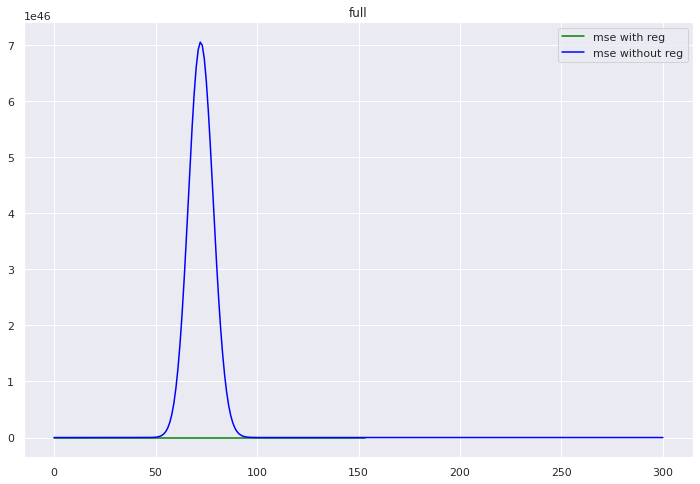

In [76]:
plt.figure(figsize=(12,8))
plt.plot(all_mse_with[0], color='green', label='mse with reg')
plt.plot(all_mse_without[0], color='blue', label='mse without reg')
plt.title('full')
plt.legend()

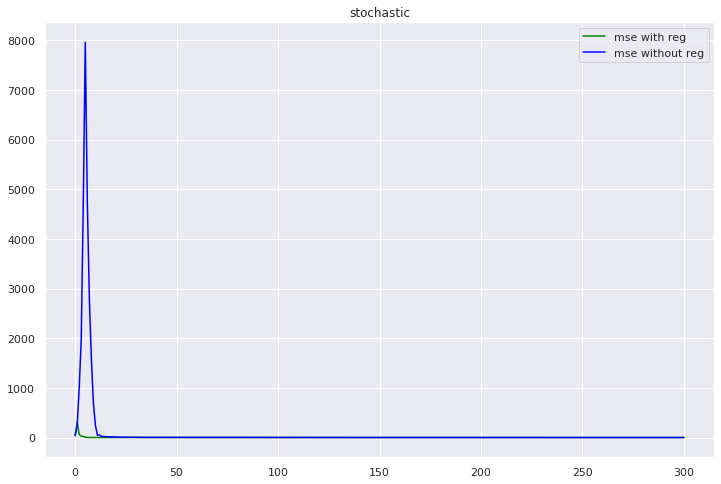

In [77]:
plt.figure(figsize=(12,8))
plt.plot(all_mse_with[1], color='green', label='mse with reg')
plt.plot(all_mse_without[1], color='blue', label='mse without reg')
plt.title('stochastic')
plt.legend()

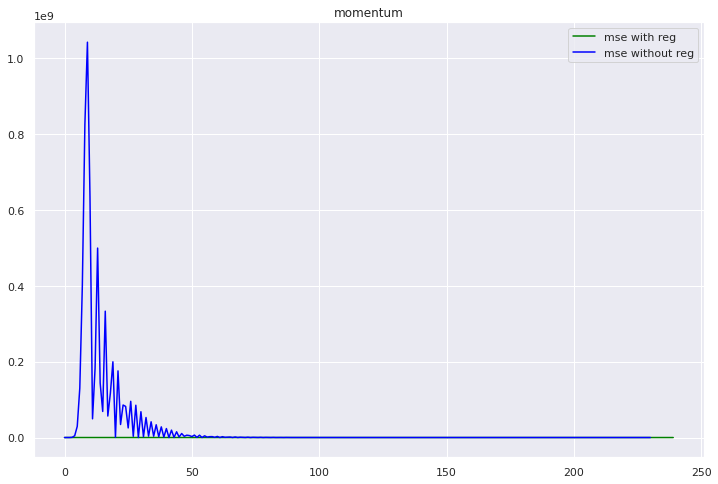

In [78]:
plt.figure(figsize=(12,8))
plt.plot(all_mse_with[2], color='green', label='mse with reg')
plt.plot(all_mse_without[2], color='blue', label='mse without reg')
plt.title('momentum')
plt.legend()

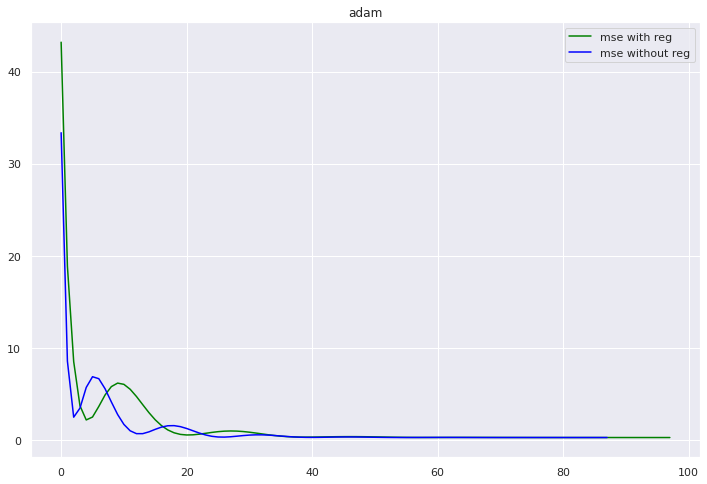

In [79]:
plt.figure(figsize=(12,8))
plt.plot(all_mse_with[3], color='green', label='mse with reg')
plt.plot(all_mse_without[3], color='blue', label='mse without reg')
plt.title('adam')
plt.legend()

Графики получились странными, потому что на графиках ошибки без регуляризации значения функции намного больше. 

Построим графики чуть по-другому:

Text(0.5, 1.0, 'adam mse without reg')

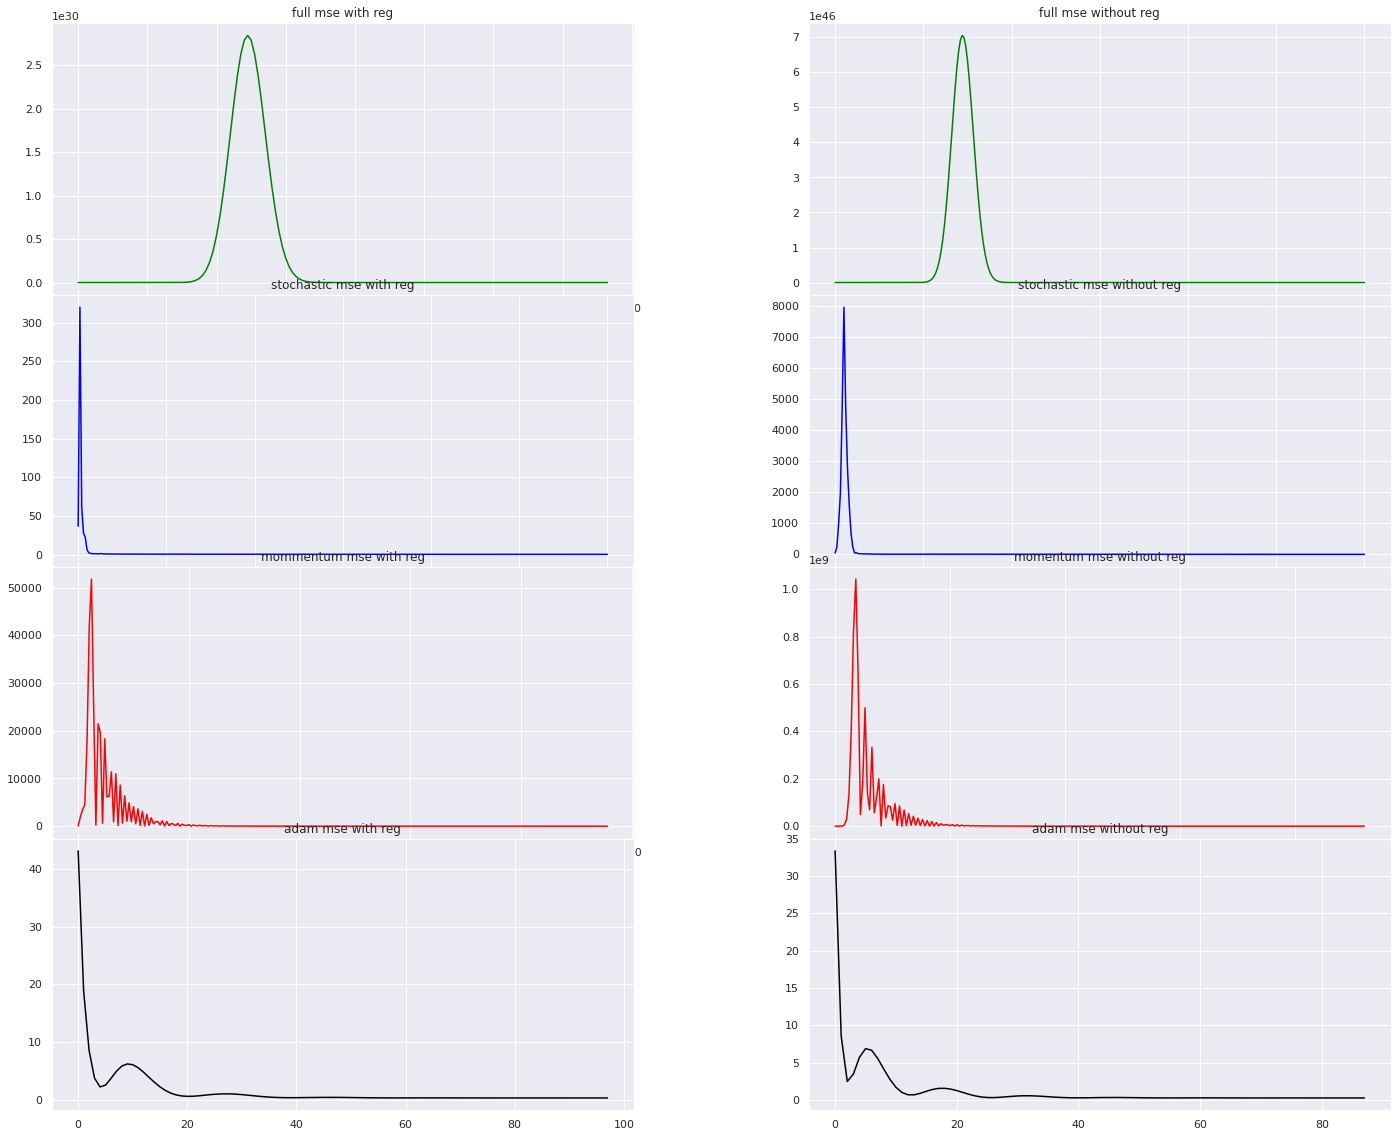

In [80]:
fig, ax = plt.subplots(4,2, figsize=(24,20))
plt.subplots_adjust(wspace=0.3, hspace=0)

ax[0, 0].plot(all_mse_with[0], color='green')
ax[0, 0].set_title("full mse with reg")
  
ax[0, 1].plot(all_mse_without[0], color='green')
ax[0, 1].set_title("full mse without reg")

ax[1, 0].plot(all_mse_with[1], color='blue')
ax[1, 0].set_title("stochastic mse with reg")
  
ax[1, 1].plot(all_mse_without[1], color='blue')
ax[1, 1].set_title("stochastic mse without reg")

ax[2, 0].plot(all_mse_with[2], color='red')
ax[2, 0].set_title("mommentum mse with reg")
  
ax[2, 1].plot(all_mse_without[2], color='red')
ax[2, 1].set_title("momentum mse without reg")

ax[3, 0].plot(all_mse_with[3], color='black')
ax[3, 0].set_title("adam mse with reg")
  
ax[3, 1].plot(all_mse_without[3], color='black')
ax[3, 1].set_title("adam mse without reg")

Получается, что графики очень похожи между собой, но графики функций с регуляризацией лучше отмасштабированы, и ошибка на них получается меньше, чем без регуляризации.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

$$
    L'(y, a)
    =
    \tanh(a - y)  X^T.
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [81]:
from descents import get_descent
from linear_regression import LinearRegression

In [82]:
# YOUR CODE:
r2_logcosh = []
iters_logcosh = []
lambda_for_methods_lc = []
all_errs_lc = []
to_add = all_lambda[0]
all_methods = ['full', 'stochastic', 'momentum', 'adam']
for method_now in all_methods:
  best_r2 = -1000
  best_r2_train = 0
  best_r2_test = 0
  best_iters = 301
  loss = []
  for lambda_now in all_lambda:
      descent_config = {
      'descent_name': method_now,
      'kwargs': {
          'lambda_': lambda_now,
          'loss_function': 'LogCosh',
          'dimension': X_val.shape[1]}}
      descent = get_descent(descent_config)
      regr = LinearRegression(descent_config=descent_config)
      regr.fit(X_val, y_val.to_numpy())
      now_r2 = r2_score(y_val, regr.predict(X_val))
      if (best_r2 == -1000) | (best_r2 < now_r2):
        best_r2_train = r2_score(y_train, regr.predict(X_train)) # считаем метрику на обучающей выборке
        best_r2_test = r2_score(y_test, regr.predict(X_test)) # считаем метрику на тестовой выборке
        best_iters = len(regr.loss_history) # считаем количество итераций до сходимости
        to_add = lambda_now
        best_r2 = now_r2
        loss = regr.loss_history
  lambda_for_methods_lc.append(to_add)
  r2_logcosh.append(best_r2_train)
  r2_logcosh.append(best_r2_test)
  iters_logcosh.append(best_iters)
  all_errs_lc.append(loss)


In [83]:
print('full')
print('r2_train mse = ', r2[0])
print('r2_train logcosh = ', r2_logcosh[0])
print('r2_test mse = ', r2[1])
print('r2_test logcosh = ', r2_logcosh[1])
print('\n')

print('stochastic')
print('r2_train mse = ', r2[2])
print('r2_train logcosh = ', r2_logcosh[2])
print('r2_test mse = ', r2[3])
print('r2_test logcosh = ', r2_logcosh[3])
print('\n')

print('momentum')
print('r2_train mse = ', r2[4])
print('r2_train logcosh = ', r2_logcosh[4])
print('r2_test mse = ', r2[5])
print('r2_test logcosh = ', r2_logcosh[5])
print('\n')

print('adam')
print('r2_train mse = ', r2[6])
print('r2_train logcosh = ', r2_logcosh[6])
print('r2_test mse = ', r2[7])
print('r2_test logcosh = ', r2_logcosh[7])
print('\n')


full
r2_train mse =  0.7639176305754563
r2_train logcosh =  0.7628603793387208
r2_test mse =  0.746497438701982
r2_test logcosh =  0.7452931434328051


stochastic
r2_train mse =  0.754582640625341
r2_train logcosh =  0.747738335598759
r2_test mse =  0.7367684089108772
r2_test logcosh =  0.7312709792230647


momentum
r2_train mse =  0.7683414172411553
r2_train logcosh =  0.7685494393132272
r2_test mse =  0.7509406444061973
r2_test logcosh =  0.7512535859363


adam
r2_train mse =  0.7722758892738862
r2_train logcosh =  0.7722960180468021
r2_test mse =  0.7542521985334563
r2_test logcosh =  0.7543275064032497




Значит, стало немного лучше.

In [84]:
print('Количество итераций до сходимости:')
print('')
print('full mse:', iters[0])
print('full logcosh:', iters_logcosh[0])
print('')

print('stochastic mse:', iters[1])
print('stochastic logcosh:', iters_logcosh[1])
print('')

print('momentum mse:', iters[2])
print('momentum logcosh:', iters_logcosh[2])
print('')

print('adam mse:', iters[3])
print('adam logcosh:', iters_logcosh[3])
print('')


Количество итераций до сходимости:

full mse: 301.0
full logcosh: 80

stochastic mse: 301.0
stochastic logcosh: 301

momentum mse: 297.7
momentum logcosh: 102

adam mse: 287.5
adam logcosh: 99



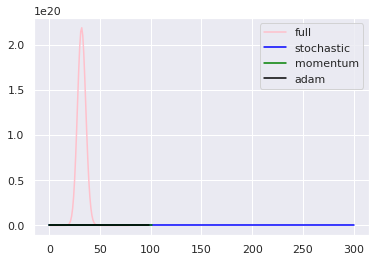

In [85]:
plt.plot(all_errs_lc[0], color='pink', label='full')
plt.plot(all_errs_lc[1], color='blue', label='stochastic')
plt.plot(all_errs_lc[2], color='green', label='momentum')
plt.plot(all_errs_lc[3], color='black', label='adam')
plt.legend()

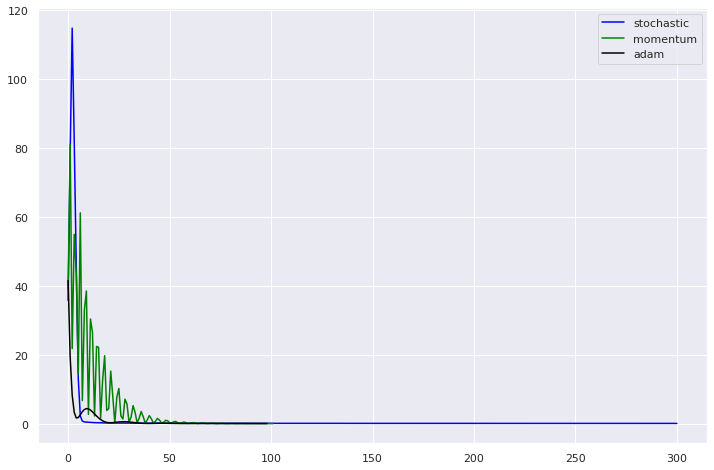

In [86]:
plt.figure(figsize=(12,8))
plt.plot(all_errs_lc[1], color='blue', label='stochastic')
plt.plot(all_errs_lc[2], color='green', label='momentum')
plt.plot(all_errs_lc[3], color='black', label='adam')
plt.legend()

Результаты очень похожи между собой.

## Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

К сожалению, домашка по МО занимает достаточно много времени, и на готовку его практически не остается((. Поэтому единственное из еды, что описывает мое настроение, - это доширак.

Я накормила им одного человека, ему сначала понравилось, но потом он слег на один день с отравлением. Видимо, мишленовскую звезду мне не получить.

Прошло 2 дня. Я приготовила кое-что другое (спойлер: в этот раз никто не отравился).

Итак, рецепт: 

Нам понадобится несколько картошечек, небольшой кусочек сала, масло и специи.

Берём картошку, моем, режем на две или четыре части. Наливаем немного масла в картошку, добавляем соль и перец, мешаем.

Выкладываем на противень, сверху кладем порезанное сало. Ставим в духовку.

Когда все это дело запеклось, достаем.

Это блюдо у нас называется кораблики.

Фото прикрепляю. На вид может это и не очень, но по вкусу просто вау.

Всем понравилось, все довольны.

In [87]:
from IPython.display import Image

png = files.upload()

Saving картошечка.jpg to картошечка.jpg


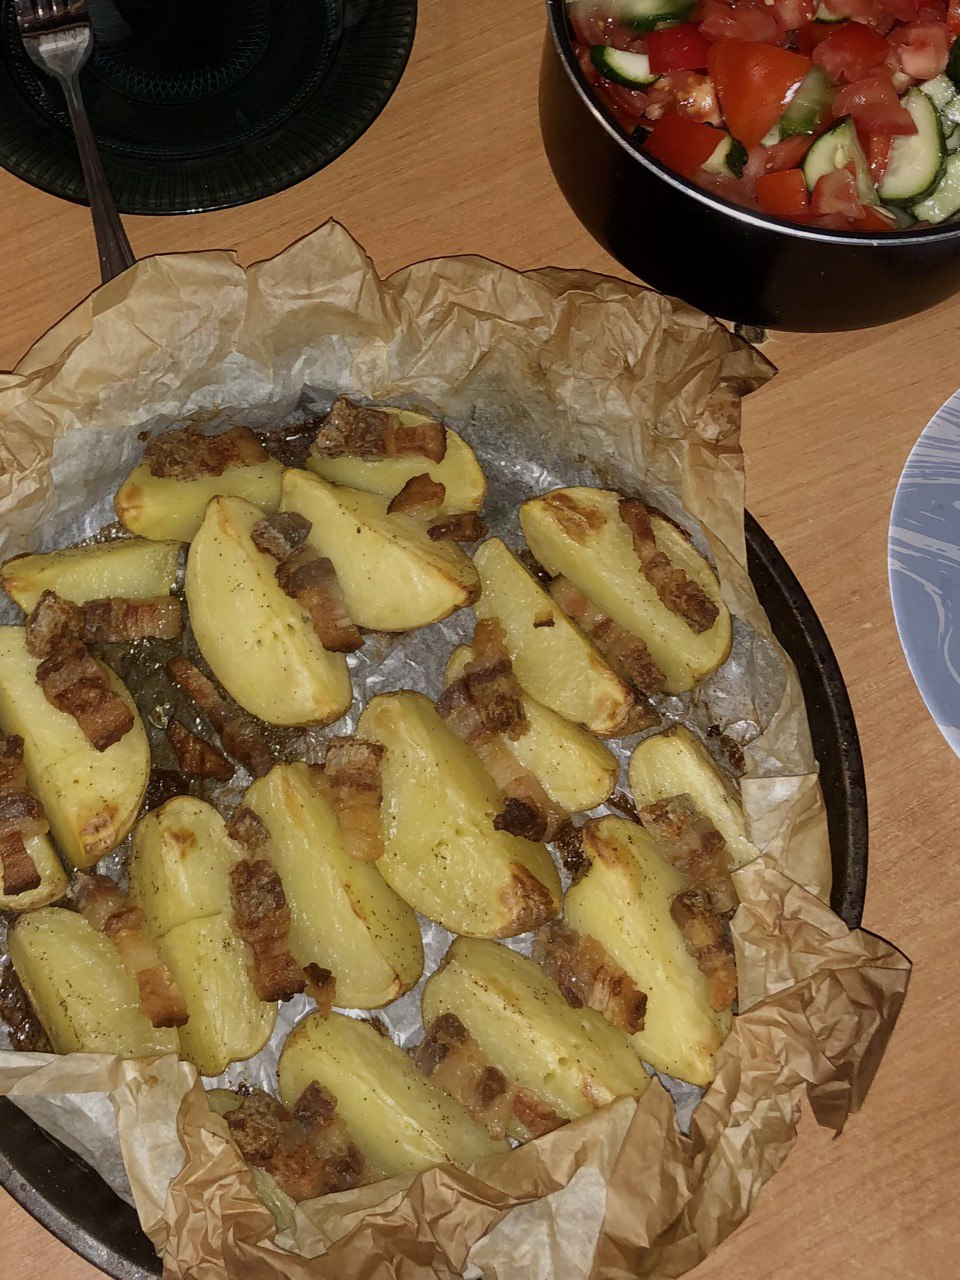

In [88]:
Image('картошечка.jpg', height = 500)

## Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

Я буду реализовывать метод AMSGrad.

Выпишем формулы данного метода:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{v}_{k+1} = max(\widehat{v}_{k}, v_{k+1}); \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} {m}_{k + 1}.
\end{align}

In [107]:
# YOUR CODE:
all_methods = ['full', 'stochastic', 'momentum', 'adam', 'amsgrad']

In [115]:
r2_ams = []
iters_ams = []
lambda_for_methods_ams = []
all_errs_ams = []
to_add = all_lambda[0]
for method_now in all_methods:
  best_r2 = -1000
  best_r2_train = 0
  best_r2_test = 0
  best_iters = 301
  loss = []
  for lambda_now in all_lambda:
      descent_config = {
      'descent_name': method_now,
      'kwargs': {
          'lambda_': lambda_now,
          'dimension': X_val.shape[1]}}
      descent = get_descent(descent_config)
      regr = LinearRegression(descent_config=descent_config)
      regr.fit(X_val, y_val.to_numpy())
      now_r2 = r2_score(y_val, regr.predict(X_val))
      if (best_r2 == -1000) | (best_r2 < now_r2):
        best_r2_train = r2_score(y_train, regr.predict(X_train)) # считаем метрику на обучающей выборке
        best_r2_test = r2_score(y_test, regr.predict(X_test)) # считаем метрику на тестовой выборке
        best_iters = len(regr.loss_history) # считаем количество итераций до сходимости
        to_add = lambda_now
        best_r2 = now_r2
        regr.fit(X_train, y_train.to_numpy())
        loss = regr.loss_history
  lambda_for_methods_ams.append(to_add)
  r2_ams.append(best_r2_train)
  r2_ams.append(best_r2_test)
  iters_ams.append(best_iters)
  all_errs_ams.append(loss)


In [116]:
print('full')
print('r2_train = ', r2_ams[0])
print('r2_test = ', r2_ams[1])
print('\n')

print('stochastic')
print('r2_train = ', r2_ams[2])
print('r2_test = ', r2_ams[3])
print('\n')

print('momentum')
print('r2_train = ', r2_ams[4])
print('r2_test = ', r2_ams[5])
print('\n')

print('adam')
print('r2_train = ', r2_ams[6])
print('r2_test = ', r2_ams[7])
print('\n')

print('amsgrad')
print('r2_train = ', r2_ams[8])
print('r2_test = ', r2_ams[9])


full
r2_train =  0.7634014142844527
r2_test =  0.7464838894399481


stochastic
r2_train =  0.7512294543084329
r2_test =  0.7333649800583939


momentum
r2_train =  0.7693588309211665
r2_test =  0.751733510644693


adam
r2_train =  0.7724202793134505
r2_test =  0.7543940975424159


amsgrad
r2_train =  0.7722570121572523
r2_test =  0.7543108417265609


In [117]:
print('Количество итераций до сходимости:')
print('full:', iters_ams[0])
print('stochastic:', iters_ams[1])
print('momentum:', iters_ams[2])
print('adam:', iters_ams[3])
print('amsgrad:', iters_ams[3])


Количество итераций до сходимости:
full: 80
stochastic: 301
momentum: 107
adam: 96
amsgrad: 96


In [118]:
lambda_for_methods

[4.52035365636025, 1.3738237958832638, 3.039195382313201, 0.9236708571873865]

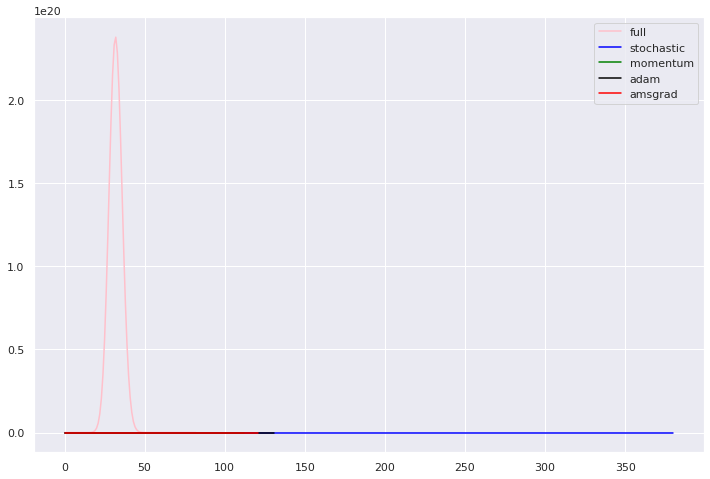

In [119]:
plt.figure(figsize=(12,8))
plt.plot(all_errs_ams[0], color='pink', label='full')
plt.plot(all_errs_ams[1], color='blue', label='stochastic')
plt.plot(all_errs_ams[2], color='green', label='momentum')
plt.plot(all_errs_ams[3], color='black', label='adam')
plt.plot(all_errs_ams[4], color='red', label='amsgrad')
plt.legend()

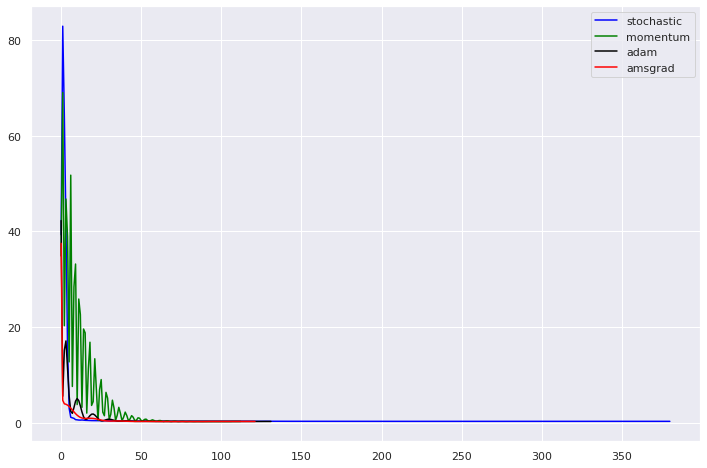

In [120]:
plt.figure(figsize=(12,8))
plt.plot(all_errs_ams[1], color='blue', label='stochastic')
plt.plot(all_errs_ams[2], color='green', label='momentum')
plt.plot(all_errs_ams[3], color='black', label='adam')
plt.plot(all_errs_ams[4], color='red', label='amsgrad')
plt.legend()

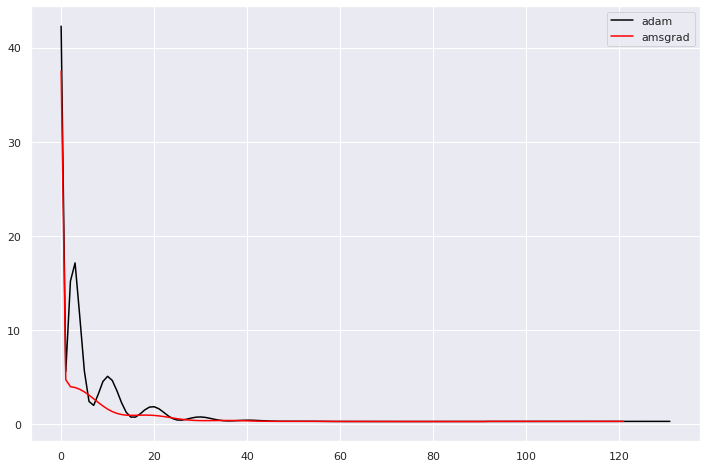

In [121]:
plt.figure(figsize=(12,8))
plt.plot(all_errs_ams[3], color='black', label='adam')
plt.plot(all_errs_ams[4], color='red', label='amsgrad')
plt.legend()

Adam и AMSGrad очень похожи (ну это логично, т. к. AMSGrad - наследник Adam). Но график AMSGrad более сглаженный.

## Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

MAE:

$$L(y, a) = \sum_{i=1}^{n} |a - y_i|$$

$$L'(y, a) = \begin{equation*} 
 \begin{cases}
   X^T &\text{$\sum_{i=1}^{n} (a - y_i) >= 0$}\\
   -X^T &\text{$\sum_{i=1}^{n} (a - y_i) < 0$}
 \end{cases}
\end{equation*}$$



Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [97]:
# YOUR CODE:
from descents import get_descent
from linear_regression import LinearRegression

In [98]:
r2_mae = []
iters_mae = []
lambda_for_methods_mae = []
all_errs_mae = []
to_add = all_lambda[0]
all_methods = ['full', 'stochastic', 'momentum', 'adam']
for method_now in all_methods:
  best_r2 = -1000
  best_r2_train = 0
  best_r2_test = 0
  best_iters = 301
  loss = []
  for lambda_now in all_lambda:
      descent_config = {
      'descent_name': method_now,
      'kwargs': {
          'lambda_': lambda_now,
          'loss_function': 'MAE',
          'dimension': X_val.shape[1]}}
      descent = get_descent(descent_config)
      regr = LinearRegression(descent_config=descent_config)
      regr.fit(X_val, y_val.to_numpy())
      now_r2 = r2_score(y_val, regr.predict(X_val))
      if (best_r2 == -1000) | (best_r2 < now_r2):
        best_r2_train = r2_score(y_train, regr.predict(X_train)) # считаем метрику на обучающей выборке
        best_r2_test = r2_score(y_test, regr.predict(X_test)) # считаем метрику на тестовой выборке
        best_iters = len(regr.loss_history) # считаем количество итераций до сходимости
        to_add = lambda_now
        best_r2 = now_r2
        loss = regr.loss_history
  lambda_for_methods_mae.append(to_add)
  r2_mae.append(best_r2_train)
  r2_mae.append(best_r2_test)
  iters_mae.append(best_iters)
  all_errs_mae.append(loss)


In [99]:
print('full')
print('r2_train mse = ', r2[0])
print('r2_train logcosh = ', r2_logcosh[0])
print('r2_train mae = ', r2_mae[0])
print('r2_test mse = ', r2[1])
print('r2_test logcosh = ', r2_logcosh[1])
print('r2_test mae = ', r2_mae[1])
print('\n')

print('stochastic')
print('r2_train mse = ', r2[2])
print('r2_train logcosh = ', r2_logcosh[2])
print('r2_train mae = ', r2_mae[2])
print('r2_test mse = ', r2[3])
print('r2_test logcosh = ', r2_logcosh[3])
print('r2_test mae = ', r2_mae[3])
print('\n')

print('momentum')
print('r2_train mse = ', r2[4])
print('r2_train logcosh = ', r2_logcosh[4])
print('r2_train mae = ', r2_mae[4])
print('r2_test mse = ', r2[5])
print('r2_test logcosh = ', r2_logcosh[5])
print('r2_test mae = ', r2_mae[5])
print('\n')

print('adam')
print('r2_train mse = ', r2[6])
print('r2_train logcosh = ', r2_logcosh[6])
print('r2_train mae = ', r2_mae[6])
print('r2_test mse = ', r2[7])
print('r2_test logcosh = ', r2_logcosh[7])
print('r2_test mae = ', r2_mae[7])
print('\n')


full
r2_train mse =  0.7639176305754563
r2_train logcosh =  0.7628603793387208
r2_train mae =  0.7640819534760045
r2_test mse =  0.746497438701982
r2_test logcosh =  0.7452931434328051
r2_test mae =  0.7461425621662126


stochastic
r2_train mse =  0.754582640625341
r2_train logcosh =  0.747738335598759
r2_train mae =  0.7496032724371214
r2_test mse =  0.7367684089108772
r2_test logcosh =  0.7312709792230647
r2_test mae =  0.7324672722962957


momentum
r2_train mse =  0.7683414172411553
r2_train logcosh =  0.7685494393132272
r2_train mae =  0.7704361145825511
r2_test mse =  0.7509406444061973
r2_test logcosh =  0.7512535859363
r2_test mae =  0.7530921773267819


adam
r2_train mse =  0.7722758892738862
r2_train logcosh =  0.7722960180468021
r2_train mae =  0.7723273468909289
r2_test mse =  0.7542521985334563
r2_test logcosh =  0.7543275064032497
r2_test mae =  0.7543687748133017




In [100]:
print('Количество итераций до сходимости:')
print('')
print('full mse:', iters[0])
print('full logcosh:', iters_logcosh[0])
print('full mae:', iters_mae[0])
print('')

print('stochastic mse:', iters[1])
print('stochastic logcosh:', iters_logcosh[1])
print('stochastic mae:', iters_mae[1])
print('')

print('momentum mse:', iters[2])
print('momentum logcosh:', iters_logcosh[2])
print('momentum mae:', iters_mae[2])
print('')

print('adam mse:', iters[3])
print('adam logcosh:', iters_logcosh[3])
print('adam mae:', iters_mae[3])
print('')


Количество итераций до сходимости:

full mse: 301.0
full logcosh: 80
full mae: 80

stochastic mse: 301.0
stochastic logcosh: 301
stochastic mae: 301

momentum mse: 297.7
momentum logcosh: 102
momentum mae: 112

adam mse: 287.5
adam logcosh: 99
adam mae: 106



Получается, что MSE и MAE очень похожи по результатами между собой. Проверим, что будет, если "объединить" их. Т. е. использовать функцию потерь Huber.

Huber:

$$
L(y, a) = \begin{equation*}
 \begin{cases}
   (y - a) ^ 2 / 2 &\text{$|a - y| <= δ$}\\
   \delta |y - a| + \delta ^ 2 / 2 &\text{otherwise}
 \end{cases}
\end{equation*}
$$

$$L'(y, a) = \begin{equation*}
 \begin{cases}
   X^T(Xw - y) &\text{$\sum_{i=1}^{n} (a - y_i) >= 0$}\\
   \delta X^T * sign(a - y) &\text{$\sum_{i=1}^{n} (a - y_i) < 0$}
 \end{cases}
\end{equation*}$$


Из [источника](https://russianblogs.com/article/6840440533/#:~:text=Средняя%20абсолютная%20ошибка%20(MAE)%20-,остатков%20%2F%20среднеквадратичных%20отклонений%20(MBE)）。):

Одной из самых больших проблем использования MAE является постоянный большой градиент, который может привести к тому, что минимальная точка будет пропущена, когда градиентный спуск подходит к концу. Для MSE градиент будет уменьшаться с уменьшением потерь, делая результат более точным.

В этом случае потеря Хубера очень полезна. Он упадет вблизи минимального значения из-за уменьшения градиента. Он более устойчив к выбросам, чем MSE. Поэтому потеря Хубера сочетает в себе преимущества MSE и MAE. но проблема с потерей Хьюбера состоит в том, что нам может потребоваться постоянно корректировать дельту гиперпараметра.

In [101]:
r2_h = []
iters_h = []
lambda_for_methods_h = []
all_errs_h = []
all_delta = all_lambda
to_add = all_lambda[0]
to_add_delta = all_delta[0]
delta_for_methods = []
for method_now in all_methods:
  best_r2 = -1000
  best_r2_train = 0
  best_r2_test = 0
  best_iters = 301
  loss = []
  for lambda_now in all_lambda:
    for delta_now in all_delta:
      descent_config = {
      'descent_name': method_now,
      'kwargs': {
          'lambda_': lambda_now,
          'loss_function': 'Huber',
          'delta_': delta_now,
          'dimension': X_val.shape[1]}}
      descent = get_descent(descent_config)
      regr = LinearRegression(descent_config=descent_config)
      regr.fit(X_val, y_val.to_numpy())
      now_r2 = r2_score(y_val, regr.predict(X_val))
      if (best_r2 == -1000) | (best_r2 < now_r2):
        best_r2_train = r2_score(y_train, regr.predict(X_train)) # считаем метрику на обучающей выборке
        best_r2_test = r2_score(y_test, regr.predict(X_test)) # считаем метрику на тестовой выборке
        best_iters = len(regr.loss_history) # считаем количество итераций до сходимости
        to_add = lambda_now
        to_add_delta = delta_now
        best_r2 = now_r2
        regr.fit(X_train, y_train.to_numpy())
        loss = regr.loss_history # для задания 5.2
  lambda_for_methods_h.append(to_add)
  delta_for_methods.append(to_add_delta)
  r2_h.append(best_r2_train)
  r2_h.append(best_r2_test)
  iters_h.append(best_iters)
  all_errs_h.append(loss)


In [102]:
delta_for_methods

[0.001082636733874054,
 0.01743328822199989,
 0.28072162039411785,
 0.08531678524172814]

In [103]:
lambda_for_methods_h

[3.039195382313201, 0.9236708571873865, 0.9236708571873865, 2.043359717856944]

In [104]:
print('full')
print('r2_train mse = ', r2[0])
print('r2_train logcosh = ', r2_logcosh[0])
print('r2_train mae = ', r2_mae[0])
print('r2_train huber = ', r2_h[0])
print('r2_test mse = ', r2[1])
print('r2_test logcosh = ', r2_logcosh[1])
print('r2_test mae = ', r2_mae[1])
print('r2_test huber = ', r2_h[1])
print('\n')

print('stochastic')
print('r2_train mse = ', r2[2])
print('r2_train logcosh = ', r2_logcosh[2])
print('r2_train mae = ', r2_mae[2])
print('r2_train huber = ', r2_h[2])
print('r2_test mse = ', r2[3])
print('r2_test logcosh = ', r2_logcosh[3])
print('r2_test mae = ', r2_mae[3])
print('r2_test huber = ', r2_h[3])
print('\n')

print('momentum')
print('r2_train mse = ', r2[4])
print('r2_train logcosh = ', r2_logcosh[4])
print('r2_train mae = ', r2_mae[4])
print('r2_train huber = ', r2_h[4])
print('r2_test mse = ', r2[5])
print('r2_test logcosh = ', r2_logcosh[5])
print('r2_test mae = ', r2_mae[5])
print('r2_test huber = ', r2_h[5])
print('\n')

print('adam')
print('r2_train mse = ', r2[6])
print('r2_train logcosh = ', r2_logcosh[6])
print('r2_train mae = ', r2_mae[6])
print('r2_train huber = ', r2_h[6])
print('r2_test mse = ', r2[7])
print('r2_test logcosh = ', r2_logcosh[7])
print('r2_test mae = ', r2_mae[7])
print('r2_test huber = ', r2_h[7])
print('\n')


full
r2_train mse =  0.7639176305754563
r2_train logcosh =  0.7628603793387208
r2_train mae =  0.7640819534760045
r2_train huber =  0.7651742108468703
r2_test mse =  0.746497438701982
r2_test logcosh =  0.7452931434328051
r2_test mae =  0.7461425621662126
r2_test huber =  0.7474925571261031


stochastic
r2_train mse =  0.754582640625341
r2_train logcosh =  0.747738335598759
r2_train mae =  0.7496032724371214
r2_train huber =  0.7568441581197369
r2_test mse =  0.7367684089108772
r2_test logcosh =  0.7312709792230647
r2_test mae =  0.7324672722962957
r2_test huber =  0.739189228314095


momentum
r2_train mse =  0.7683414172411553
r2_train logcosh =  0.7685494393132272
r2_train mae =  0.7704361145825511
r2_train huber =  0.7693132261792099
r2_test mse =  0.7509406444061973
r2_test logcosh =  0.7512535859363
r2_test mae =  0.7530921773267819
r2_test huber =  0.75147729900375


adam
r2_train mse =  0.7722758892738862
r2_train logcosh =  0.7722960180468021
r2_train mae =  0.7723273468909289


In [105]:
print('Количество итераций до сходимости:')
print('')
print('full mse:', iters[0])
print('full logcosh:', iters_logcosh[0])
print('full mae:', iters_mae[0])
print('full huber:', iters_h[0])
print('')

print('stochastic mse:', iters[1])
print('stochastic logcosh:', iters_logcosh[1])
print('stochastic mae:', iters_mae[1])
print('stochastic huber:', iters_h[1])
print('')

print('momentum mse:', iters[2])
print('momentum logcosh:', iters_logcosh[2])
print('momentum mae:', iters_mae[2])
print('momentum huber:', iters_h[2])
print('')

print('adam mse:', iters[3])
print('adam logcosh:', iters_logcosh[3])
print('adam mae:', iters_mae[3])
print('adam huber:', iters_h[3])
print('')


Количество итераций до сходимости:

full mse: 301.0
full logcosh: 80
full mae: 80
full huber: 80

stochastic mse: 301.0
stochastic logcosh: 301
stochastic mae: 301
stochastic huber: 301

momentum mse: 297.7
momentum logcosh: 102
momentum mae: 112
momentum huber: 107

adam mse: 287.5
adam logcosh: 99
adam mae: 106
adam huber: 99



Итог: качество практически не меняется при изменении функции потерь, но все же функция huber справляется немного лучше остальных.